In [17]:
import pandas as pd
data = pd.read_csv('fake_data.csv')
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [21]:
data = data.drop(columns = ['id' ,'title' , 'author'])

In [23]:
data.isnull().sum()

text     143
label      0
dtype: int64

In [25]:
data.dropna(inplace=True)

In [29]:
data.shape

(20657, 2)

In [31]:
import string 
#remove additional sign from string expressions
def punctuation_removal(text):
    text=text.lower()
    all_list = [char for char in text if char not in string.punctuation]
    clean_str=''.join(all_list)
    return clean_str

data['text']=data['text'].apply(punctuation_removal)     # datanin text columundan butun durgu isareleri silindi

In [33]:
data.head()

,text,label
0,house dem aide we didn’t even see comey’s lett...,1
1,ever get the feeling your life circles the rou...,0
2,why the truth might get you fired october 29 2...,1
3,videos 15 civilians killed in single us airstr...,1
4,print \nan iranian woman has been sentenced to...,1


<Axes: xlabel='label'>

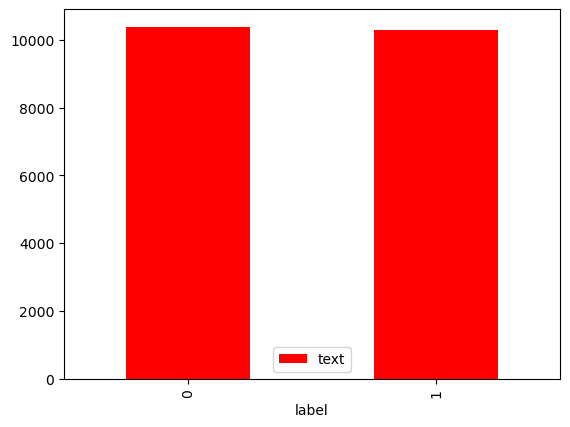

In [37]:
data.groupby(['label']).count().plot(kind='bar' , color='red')

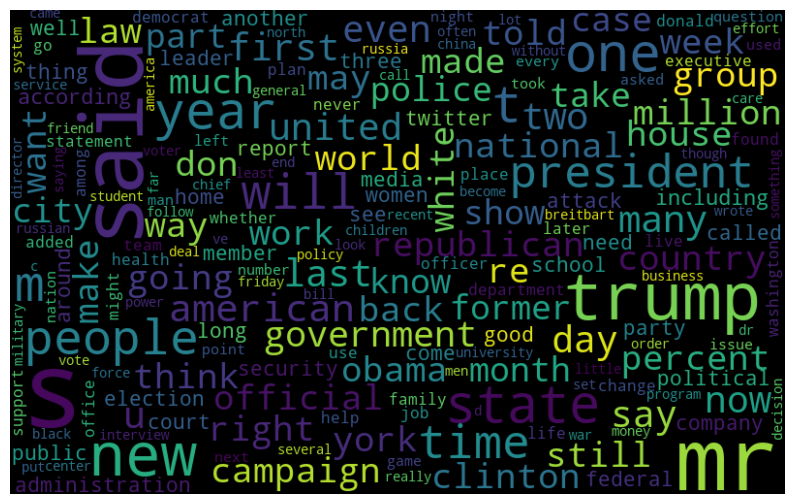

In [48]:
from wordcloud import WordCloud
# Sample text data
fake_data=data[data['label']==0]
text=' '.join([text for text in fake_data.text])

# Create a WordCloud object with default settings
wordcloud = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(text)

# Display the WordCloud using matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

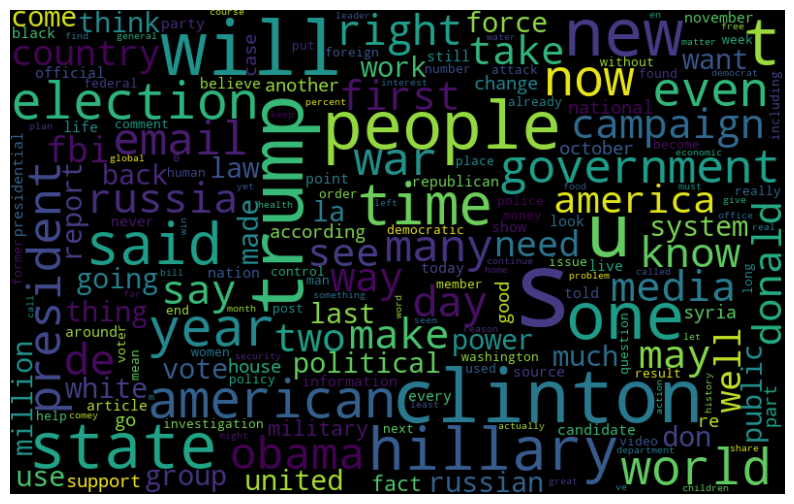

In [52]:
true_data=data[data['label']==1]
true_text=' '.join([true_text for true_text in true_data.text])

wordcloud = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(true_text)

# Display the WordCloud using matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [53]:
# Most frequent words counter   
import nltk
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

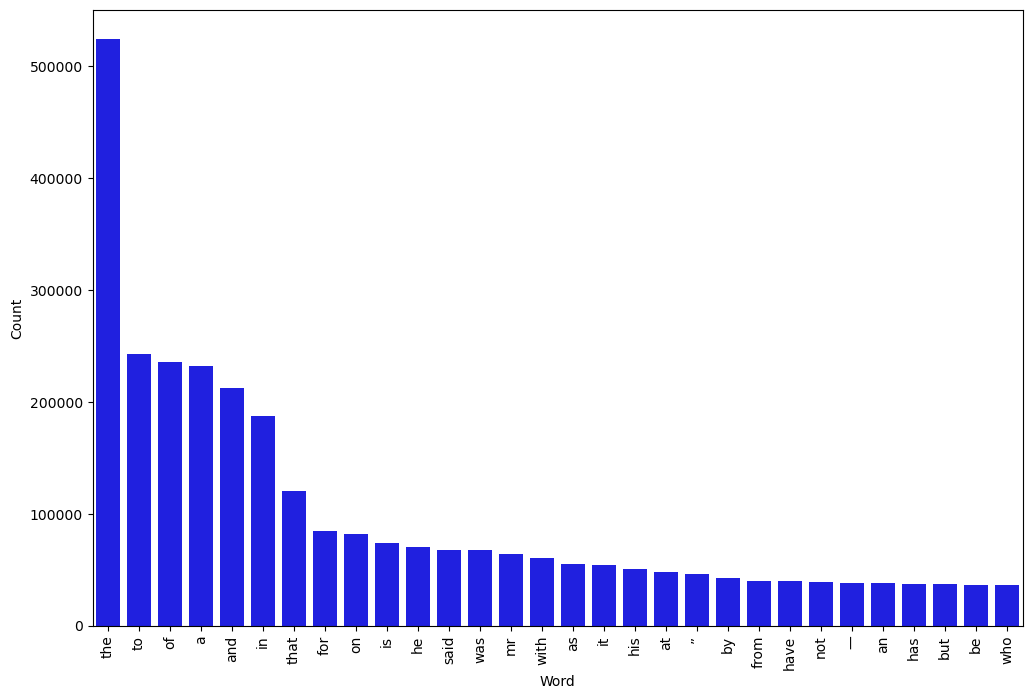

In [56]:
# Most frequent words in fake news
counter(data[data["label"] == 0], "text",30)

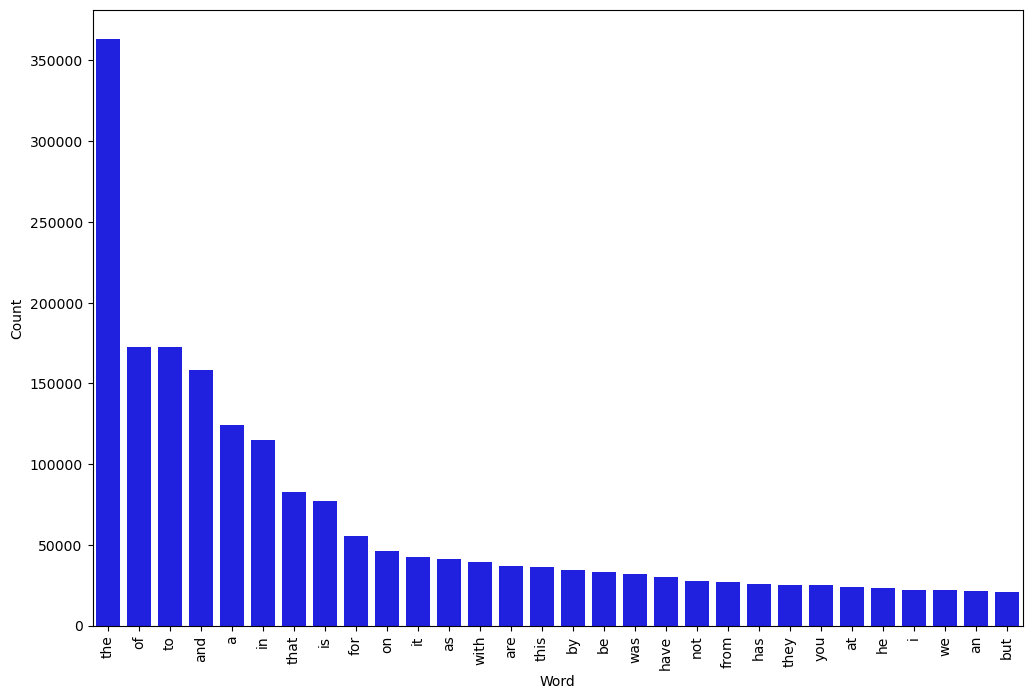

In [57]:
# Most frequent words in real news
counter(data[data["label"] == 1], "text", 30)

In [61]:
x=data['text']
y=data['label']

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [67]:
xv_train=TfidfVectorizer().fit_transform(x_train)
xv_test=TfidfVectorizer().fit_transform(x_test)

In [74]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', TfidfVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])

In [76]:
model = pipe.fit(x_train, y_train)
prediction=model.predict(x_test)
print(accuracy_score(y_test,prediction))

0.9031945788964182
